In [1]:
# linear regression using gradient descent

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel('data/linear_reg.xlsx')

x_train = data['x'].values
y_train = data['y'].values

In [2]:
theta0 = 0
theta1 = 0

alpha = 0.001
m = len(x_train)

iterations = range(500)
mse_li = []

In [3]:
for _ in iterations:
    # tweak the intercept
    losses = 0
    for i in range(len(x_train)):
        h = theta0 + theta1 * x_train[i]  # hypothesis (predict the y value given x)
        loss = h - y_train[i]  # get the loss (error)
        losses += loss
    temp0 = theta0 - alpha / m * losses

    # tweak the slope
    losses = 0
    for i in range(len(x_train)):
        h = theta0 + theta1 * x_train[i]
        loss = (h - y_train[i]) * x_train[i]
        losses += loss
    temp1 = theta1 - alpha / m * losses

    # update values
    theta0 = temp0
    theta1 = temp1

    # mean squared error
    mse_total = 0
    for i in range(len(x_train)):
        h = theta0 + theta1 * x_train[i]
        mse = (h - y_train[i])**2
        mse_total += mse
    mse_li.append(mse_total)

In [4]:
# print equation
print('y = %.2f + %.2fx' % (theta0, theta1))

y = 1.06 + 3.60x


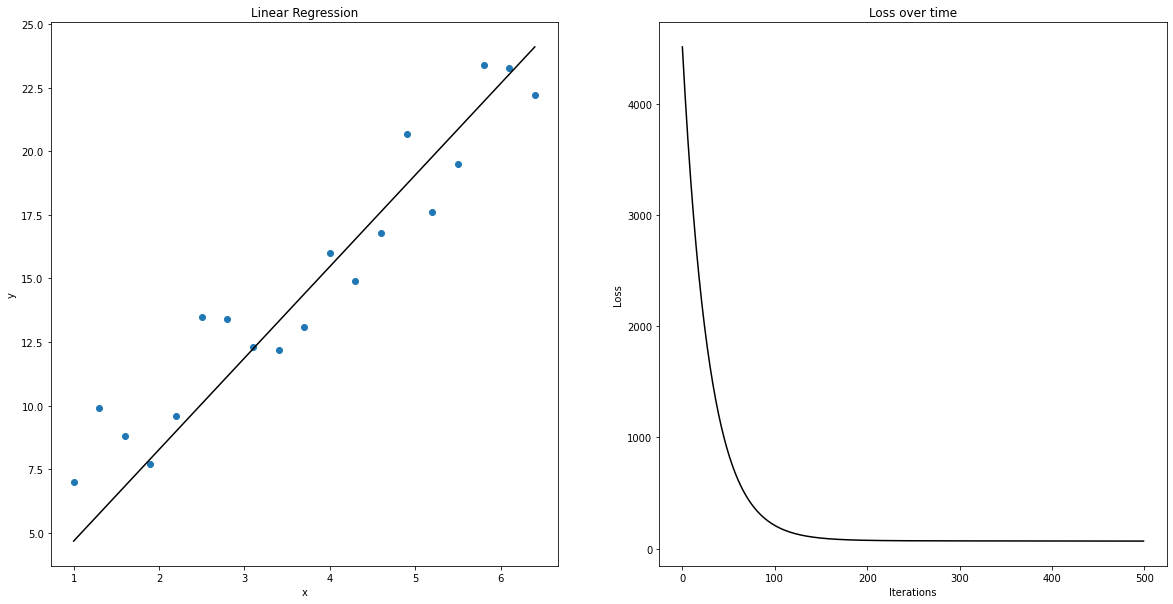

In [5]:
# plot results
fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(121)
ax1.set_title('Linear Regression')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# plot the data points
ax1.scatter(x_train, y_train)

# plot the regression line
y_pred = theta0 + theta1 * x_train
ax1.plot(x_train, y_pred, 'k-')

# plot how the loss decreases over time
ax2 = fig.add_subplot(122)
ax2.set_title('Loss over time')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Loss')
ax2.plot(iterations, mse_li, 'k-')

plt.show()